<a href="https://colab.research.google.com/github/yingjuan2015/ML-Final-Project/blob/main/kw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Instructions**

This document is a template, and you are not required to follow it exactly. However, the kinds of questions we ask here are the kinds of questions we want you to focus on. While you might have answered similar questions to these in your project presentations, we want you to go into a lot more detail in this write-up; you can refer to the Lab homeworks for ideas on how to present your data or results. 

You don't have to answer every question in this template, but you should answer roughly this many questions. Your answers to such questions should be paragraph-length, not just a bullet point. You likely still have questions of your own -- that's okay! We want you to convey what you've learned, how you've learned it, and demonstrate that the content from the course has influenced how you've thought about this project.

# Project Name
Project mentor: Numair Sani

Yusen Zhang <yzhan407@jh.edu>, Rui Liu <rliu54@jh.edu>, Juan Ying <jying6@jh.edu>, Ke Wang <kwang75@jh.edu>

Link_to_git_repo

# Outline and Deliverables

### Uncompleted Deliverables
1. "Would Like to Accomplish #1": We evetually decided to abandon the idea of implementing Recurrent Neural Networks for our project since we do not have enough data: In order to keep the tempotal nature of our dataset, each row must correspond to one date. As a result, the size of our dataset are at most 300 days(Since start date of Covid-outbreak is around Early March, Dataset were usually collected around that time).
2. "Would like to Accomplish #2" : We did not implement the idea of 'State Space model' since it's too complicated and we don't have enough time.


### Completed Deliverables
1. "Must Accomplish #1" : We construct linear model as our baseline model to make predictions for newly confirmed cases. The features of the model include lag terms, stock price, protest number, travel number, total cases, confirmed cases, probable cases, total death and new death etc. (Under Models and Evaluation Section)
2. "Must Accomplish #2" : Instead of feature selection methods like PCA, L1-NORM and L2-NORM, we implemented Variance methods and Correlation Filter Methods to extract the most significant features.(Under Pre-processing, Feature Selection section)
3. "Must Accomplish #3" : Given the temporal nature of the data, We implemented the idea of 'Nested Cross Validation' to make sure validation set is subsequent to the training set.(Under Pre-processing section)
4. "Expected Accomplish #1" : We have applied ARIMA model to our dataset with differencing factor of 1 to make the whole time series stationary. Also, for ARIMAX model, we applied our self-implemented function to decompose the data into trend plus seasonal factor plus residual. We then remove the trend and seasonal factor from the time series data to make it stationary.
5. "Expected Accomplish #2" : Compare the different feature selection results between Variance method and Correlation Filter.(Under Models and Evaluations, Methods, Time Series Model section)
6. "Expected Accomplish #3" : We have compared the performance of different models in our project, which includes Linear model(baseline), ARIMA model and ARIMAX model.(Under Models and Evaluations, Methods, Time Series Model, result section)
7. "Would Like to Accomplish #3" : We have tried out the tree based methods for this regression problem.(Under Models and Evaluations, Methods, Tree Regression and RandomForest Regression section)



### Additional Deliverables
1. Consider the effect of state and create time series model for each state.(Under Models and Evaluation, Methods, Times Series Model, Addtional: Searching for best ARIMA model for each state section)
2. In stead of seperately fitting Autoregreesive Model and Moving Average model to our time series data, we combined them together into ARIMA model with differencing factor one. Doing so resovled the issue of 'unstationary series' at the same time.(Models and Evaluations, Methods, Time Seris Model, Searching for the best ARIMA model section)
3. Also tried to decompose our time seires data into three parts: trend, seasonality and residual. The residual would be a stationary time series and as a result we can apply our model on it. (Models and Evaluations, Methods, Time Seris Model, stationary section )







# Preliminaries

## What problem were you trying to solve or understand?

The problem is quite relevant to real world, because it helps us better understand how fast the virus spreads thus we could make correct decisions in early stage to avoid the large outbreak.The data of covid-19 patient numbers also indicates when people started to record this new disease and whether they paid attention to its spread.

This problem is kind of similar to Google Flu Trend. But compared to flu, the spread time of COVID-19 is only within one year from the end of 2019 which is rather short for research, so the data source is a little limited. But the scale and severity of COVID-19 outbreak is alarming unlike any infectious diseases before.

A successful prediction model leads to governor’s faster reaction even before the outbreaks of disease and most people should be benefit from it. However, an early quarantine can cause unnecessary loss in many fields such as employment and stock. Also the outbreak may not be convincing enough for the general public to accept the quarantine since not many evidences can be seen.

## Dataset(s)

We downloaded "United States COVID-19 Cases and Deaths by State over Time" from CDC website as our main dataset. Further to find out other factors’ influence, we also use data of everyday protest number(according to The Armed Conflict Location & Event Data Project), Dow Jones index and traveler number among US(according to Transportation Security Administration) through 2020.

Except for the obvious relation between newly confirmed cases and existing cases, we believe the protest number and the traveler number can tell how many people are not in quarantine. And the country's economy reflected by Dow Jones index also indicates how confidence the public is to fight with the virus.

The original datasets have 289 samples and could provide 10 valid features apart from newly confirmed cases. We added protest, travel numbers and DJI, which gives us 13 features in total. The protest data records 168 days since May. The travel number data includes 263 days since March. And DJI is collected for a whole year. 


In [ ]:
# Load your data and print 2-3 examples

In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [3]:
# Wang ke
df=pd.read_csv('/content/drive/MyDrive/machine learning/final project/covid.csv')
df_protest=pd.read_csv("/content/drive/MyDrive/machine learning/final project/protests.csv")
df_stock=pd.read_csv("/content/drive/MyDrive/machine learning/final project/stock price.csv")
df_travelnum=pd.read_csv('/content/drive/MyDrive/machine learning/final project/TravelNumbers.csv')

In [ ]:
#For local file reading use
df=pd.read_csv('covid.csv')
df_protest=pd.read_csv("protests.csv")
df_stock=pd.read_csv("stock price.csv")
df_travelnum=pd.read_csv('TravelNumbers.csv')

### Covid Dataset

In [4]:
df.head(3)

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,01/22/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
1,01/23/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
2,01/24/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree


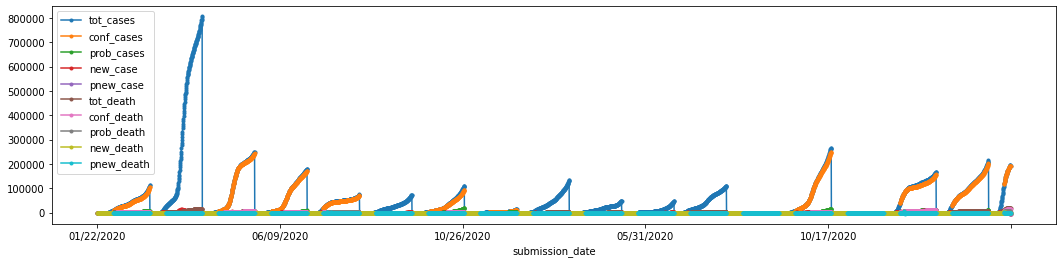

In [5]:
df.set_index('submission_date')[:5000].plot(figsize=(18,4),marker='.')

The original Covid dataset is a concatenation of a series of panel data.  Each clip of the plot is representing a state of the United state. To better visualize that, we picked the "new_case" column individually and did a plot on each states.

In [6]:
pip install -i https://pypi.tuna.tsinghua.edu.cn/simple altair

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [7]:
import altair as alt

df.set_index('submission_date',inplace=True)
df_panel=df[['state','new_case']]
df_panel.index=pd.to_datetime(df_panel.index)
df_panel_frag=df_panel.loc['2020-07-10':'2020-9-30']
df_panel_frag.reset_index(inplace=True)

alt.Chart(df_panel_frag).mark_area().encode(x='submission_date',y='new_case',color='state').interactive()

alt.Chart(...)

As we can see, though the values of new cases for each states are various, the patterns are the same. That is why we decided to take the sum of the values of each states at each time point and take the new time seires, which is in fact the daily new cases of USA as our target at the very first place. 

This also indicates that there might be a same model that could be applicable for all the state. So in this report, we would try to find a common model for all the states apart from studying the new cases of the entire USA.

### Protest Number Dataset Peek

In [8]:
df_protest.head(3)

,ISO,EVENT_ID_CNTY,EVENT_ID_NO_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,INTER1,ACTOR2,ASSOC_ACTOR_2,INTER2,INTERACTION,REGION,COUNTRY,ADMIN1,ADMIN2,ADMIN3,LOCATION,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES
0,840,USA4524,4524,24-May-2020,2020,1,Protests,Peaceful protest,Protesters (United States),NaN,6,NaN,NaN,0,60,North America,United States,Maryland,Baltimore City,NaN,Baltimore,39.290,-76.612,1,Fox45 (Baltimore),Subnational,"On 24 May 2020, a caravan of people staged a m...",0
1,840,USA4525,4525,24-May-2020,2020,1,Protests,Peaceful protest,Protesters (United States),NaN,6,NaN,NaN,0,60,North America,United States,Illinois,Williamson,NaN,Marion,37.731,-88.933,1,Southern Illinoisan,Subnational,"On 24 May 2020, nearly 50 people held a ""Patri...",0
2,840,USA4526,4526,24-May-2020,2020,1,Protests,Peaceful protest,Protesters (United States),NaN,6,NaN,NaN,0,60,North America,United States,Ohio,Mahoning,NaN,Youngstown,41.100,-80.650,1,WKBN,Subnational,"On 24 May 2020, an unreported number of people...",0


###Stock Dataset Peek

In [9]:
df_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,11/19/2019,28079.75977,28090.21094,27894.51953,27934.01953,27934.01953,245890000
1,11/20/2019,27879.55078,27897.27930,27675.27930,27821.08984,27821.08984,258140000
2,11/21/2019,27820.27930,27828.33008,27708.33984,27766.28906,27766.28906,232020000
3,11/22/2019,27831.23047,27898.46094,27773.98047,27875.61914,27875.61914,214780000
4,11/25/2019,27917.76953,28068.68945,27917.76953,28066.47070,28066.47070,248420000


###TSA Travel Dataset Peek

In [ ]:
df_travelnum.head()

,Date,Total Traveler Throughput,Total Traveler Throughput (1 Year Ago - Same Weekday)
0,2020/11/18,703135,2071631
1,2020/11/17,611497,1900895
2,2020/11/16,883157,2298856
3,2020/11/15,978297,2396681
4,2020/11/14,697360,1807230


## Pre-processing

###What features did you use or choose not to use? Why?

We use all the available features in the original dataset since we could not determinate which features make the most influences to our target. And we would like to perform some feature selection approaches to select the final exog features so a large number of input features at the first place would not hurt our algorithsm.

We choose lag terms because we believe that our dataset is a time series and the new cases of today must be affected by the new cases of yesterday and could affect the new cases of tomorrow.  

In addition, we added 'TSA travel number', 'Protest number' and 'Stock price' on a certain date because we believe that these factoes could possibly reflect or affect the current and future new cases. To be more specially, the stock price refers to the adjusted closing price of the market on that date. Protest number is the number of protest incident (no matter voilence or peaceful) happened in US on that date. Finally, TSA traveling number is the total flow of people in US airports on a certain date. For example, whenever there is a big rise in the number of new cases of Covid-19 on a certain date, the stock market will go down drastically. Also, the number of people traveling in airports would be a good indicator of the severity of the pandemic. Moreover, more gathering of people on the street for protests will possibly increase their chances of getting covid.

To make it clear, when we study new cases for each states individually, we only used the values provided in covid.csv since TSA travel number in each state is hard to define or get and the representive of the economic expectation in a state can vary from one place to another.
 

###How did you deal with missing data? What about outliers?


The number of protests begins at 2020-05-24 and was counted on a daily basis, while the number of travelers begins at 2020-03-01. There won't be missing values if we only use data points after 2020-05-24. However, the stock prices only have 5 more less values every week and Forward Filling: We filled the missing data by its most recent 'non-null' value；For example, the new death numebers between Mar 1st and Mar 5th in the original dataset are: 100, NA, 299, 399, NA.  After filling the null, we have: 100,100,299,399,399.

Because of the temporal nature of our dataset, we could not simply delete the outliers. So, we keep all of our data.

###What approach(es) did you use to pre-process your data? Why?

To get the new_cases series for each states, we have to seperate the concat dataframe and rearrange the data structure for our time series part.

The original dataset we have is the data group by state. Since we want like to predict the new cases in a larger picture (whole USA), we sum up all the new cases across all states in US on a certain date.

Then, we got our exogenous features such as stock price, TSA travel number, and protest number from other three seperate tables by joining them together on date. 


###Are your features continuous or categorical? How do you treat these features differently?

All of our features are continuous variables. We did not perform any tranformations on our predictors or labels.

As we stated previously ,we would studied the moving patterns on both the USA and the states individually in our time series part. So we would contruct two datasets, one(USA) for time series analysis and tree regression, and another(states) for time series analysis.

In [10]:
#preprocess-state
state=list(set(df_panel.state))
df_panel_state=df_panel[['new_case']][df['state']==state[0]]
df_panel_state.rename(columns={'new_case':state[0]},inplace=True)

for s in state[1:]:
  df_tempt=df_panel[['new_case']][df['state']==s]
  df_tempt.rename(columns={'new_case':s},inplace=True)
  df_panel_state=df_panel_state.join(df_tempt,how='outer')

In [11]:
# preprocess-USA
df_usa=df.groupby('submission_date').sum()

df_protest=df_protest.groupby("EVENT_DATE")[['EVENT_ID_CNTY']].count()
df_protest.index=pd.to_datetime(df_protest.index)
df_protest.rename(columns={'EVENT_ID_CNTY':'protest'},inplace=True)
df_protest=df_protest.sort_index()
df_protest.fillna(0)

df_stock.set_index("Date",inplace=True)
df_stock.index=pd.to_datetime(df_stock.index)
df_stock=df_stock[['Adj Close']]

df_travelnum['Date']=pd.to_datetime(df_travelnum['Date'])
df_travelnum.set_index('Date',inplace=True)
df_travelnum=df_travelnum.sort_index()[['Total Traveler Throughput']].rename(columns={'Total Traveler Throughput':'travel number'})

df=df_usa.join(df_protest,how='right').join(df_travelnum,how='left').join(df_stock)
df = df.fillna(method='ffill')
df['travel number']=df['travel number'].shift(1)
df['Adj Close']=df['Adj Close'].shift(1)

for i in range(1,10+1):
  df[i]=df['new_case'].shift(i)

df.dropna(inplace=True)

df_label=df[['new_case']]
df_features=df.drop(['new_case'], axis=1)

Notice that all the features are lagged, i.e. today's new cases dependent on yesterday's features. So we do not need to do predictions on each features to estimate the future new cases.

#### Dataset we will be working on after preprocessing

In [12]:
df.head()

,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,protest,travel number,Adj Close,1,2,3,4,5,6,7,8,9,10
EVENT_DATE,,,,,,,,,,,,,,,,,,,,,,,
2020-06-03,1842101.0,904043.0,20445.0,14676.0,-4855.0,107029.0,69720.0,6800.0,832.0,-467.0,489,267742.0,25742.65039,24955.0,14790.0,26177.0,23553.0,18123.0,21304.0,19680.0,16429.0,24958.0,15342.0
2020-06-04,1862656.0,912006.0,21161.0,20555.0,701.0,108064.0,70305.0,6956.0,1035.0,-49.0,429,304436.0,26269.89063,14676.0,24955.0,14790.0,26177.0,23553.0,18123.0,21304.0,19680.0,16429.0,24958.0
2020-06-05,1891690.0,922253.0,26735.0,29034.0,5590.0,109192.0,70812.0,7234.0,1128.0,324.0,410,391882.0,26281.82031,20555.0,14676.0,24955.0,14790.0,26177.0,23553.0,18123.0,21304.0,19680.0,16429.0
2020-06-06,1920904.0,934216.0,31901.0,29214.0,5147.0,109901.0,71435.0,7140.0,709.0,-104.0,721,419675.0,27110.98047,29034.0,20555.0,14676.0,24955.0,14790.0,26177.0,23553.0,18123.0,21304.0,19680.0
2020-06-07,1938823.0,941722.0,32737.0,17919.0,836.0,110375.0,71648.0,7224.0,474.0,93.0,490,353016.0,27110.98047,29214.0,29034.0,20555.0,14676.0,24955.0,14790.0,26177.0,23553.0,18123.0,21304.0


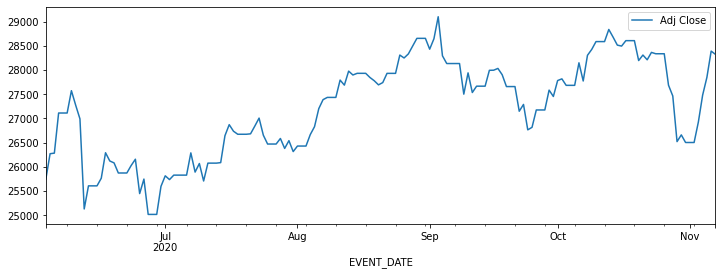

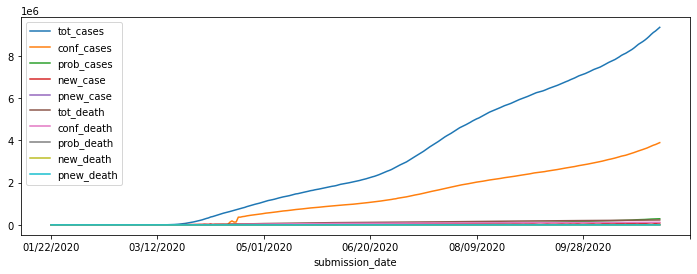

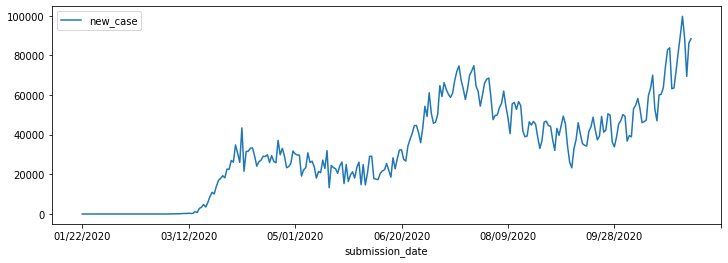

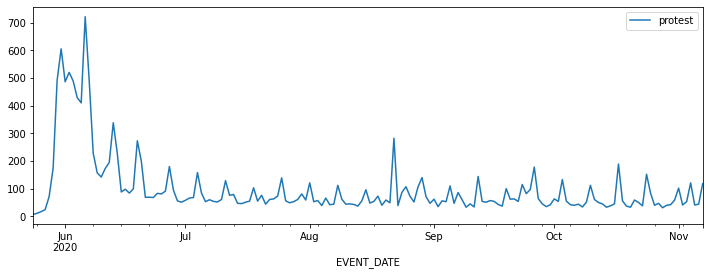

In [15]:
## features and labels- USA
df[['Adj Close']].plot(figsize=(12,4))
df_usa.plot(figsize=(12,4),title='')
df_usa[['new_case']].plot(figsize=(12,4))
df_protest.plot(figsize=(12,4))

The small platforms in the figure of stock prices is due to the forward filling we applied to the series.

As we did in the previous section, the labels and features for each state would be acquired by rearrange the dataset. The dataset after preprocessing is as follows:

In [ ]:
df_panel_state.tail()

,NV,AK,MN,UT,OH,SC,DC,ND,MO,OR,...,OK,AS,NH,GA,PA,IA,MA,CO,TX,MS
submission_date,,,,,,,,,,,,,,,,,,,,,
2020-10-30,1232,381,3154,2292,3845,1003,70,1433,5493,595,...,0,0,116,1377,2641,2670,1488,2412,6631,824
2020-10-31,977,437,3007,1724,2915,1018,122,1127,2349,533,...,2573,0,200,2565,2510,2941,1292,2924,7145,340
2020-11-01,716,348,2200,1854,3303,1411,103,972,0,508,...,1350,0,130,1192,1909,2395,1139,0,4259,365
2020-11-02,635,350,2948,1196,2909,894,69,1172,2651,549,...,1083,0,106,939,2060,1762,725,4797,4402,644
2020-11-03,911,388,3476,1669,4229,1035,86,1114,2238,482,...,1342,0,128,1668,2875,1639,923,2562,7516,766


### Feature Selection

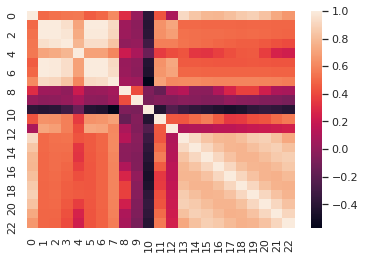

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
corr=np.corrcoef(np.transpose(np.array(pd.concat([df_label,df_features],axis=1))))
plt.figure()
sns_plot=sns.heatmap(corr)
plt.show()

As we can see from the heatmap, some of the features have high correlationship with others. Feature selection is neccessary in this case. Thus we tried different method to do the feature selection. It turns out the most applicable ones for our models is variance method and correlation Filter, where we can set threshold to control the number of exog features (time series models cannot take in too mant exog features while tree regression would).

In [17]:
size_data = np.array(pd.concat([df_label,df_features],axis=1)).shape
num_examples = size_data[0]
num_dev = num_examples // 5
num_test = num_examples // 5
num_train = num_examples - num_dev - num_test
ind_dev = list(range(num_dev))
ind_train = list(range(num_dev, num_dev + num_train))
ind_test = list(range(num_dev + num_train, num_examples))

In [18]:
#train : test = 8 : 2
data = np.array(df_features)
label = np.array(df_label)

col_names = df_features.columns

data_train = data[0:127,:]
data_test = data[127:,:]

y_train = label[0:127]
y_test = label[127:]

df_train = pd.DataFrame(data_train)
df_test = pd.DataFrame(data_test)

df_train.columns = col_names
df_test.columns = col_names

In [19]:
# Variance method
def variance_method(per):
    threshold = np.percentile(df_train.describe(include='all').transpose()['std'],per)
    features_index = np.where(df_train.describe(include='all').transpose()['std']>threshold)[0].tolist()

    data_train_variancemethods = data_train[:,features_index]
    data_test_variancemethods = data_test[:,features_index]

    df_train_variancemethods = pd.DataFrame(data_train_variancemethods)
    df_train_variancemethods.columns = col_names[features_index]
    df_test_variancemethods = pd.DataFrame(data_test_variancemethods)
    df_test_variancemethods.columns = col_names[features_index]
    return df_train_variancemethods,df_test_variancemethods

    # Correlation Filter
def correlation_filter(cor):
    correlation_matrix= np.round(np.corrcoef(data_train.T),2)
    correlation_matrix_df=pd.DataFrame(correlation_matrix)

    columns = np.full((correlation_matrix_df.shape[0],), True, dtype=bool)
    for i in range(correlation_matrix_df.shape[0]):
        for j in range(i+1, correlation_matrix_df.shape[0]):
            if correlation_matrix_df.iloc[i,j] >= cor:
                if columns[j]:
                    columns[j] = False

    df_train_corrfilter = pd.DataFrame(data_train[:,columns])
    df_train_corrfilter.columns = col_names[columns]
    df_test_corrfilter = pd.DataFrame(data_test[:,columns])
    df_test_corrfilter.columns = col_names[columns]
    return df_train_corrfilter,df_test_corrfilter

In [20]:
df_train_variancemethods,df_test_variancemethods=variance_method(90)

In [21]:
df_train_variancemethods.head()

,tot_cases,conf_cases,travel number
0,1842101.0,904043.0,267742.0
1,1862656.0,912006.0,304436.0
2,1891690.0,922253.0,391882.0
3,1920904.0,934216.0,419675.0
4,1938823.0,941722.0,353016.0


In [22]:
df_train_corrfilter,df_test_corrfilter=correlation_filter(0.6)

In [23]:
df_train_corrfilter.head()

,tot_cases,pnew_case,new_death,pnew_death,protest,1
0,1842101.0,-4855.0,832.0,-467.0,489.0,24955.0
1,1862656.0,701.0,1035.0,-49.0,429.0,14676.0
2,1891690.0,5590.0,1128.0,324.0,410.0,20555.0
3,1920904.0,5147.0,709.0,-104.0,721.0,29034.0
4,1938823.0,836.0,474.0,93.0,490.0,29214.0


# Models and Evaluation

## Experimental Setup For Time Series Model

###How did you evaluate your methods? Why is that a reasonable evaluation metric for the task?
For time series model, we are going to evaluate the performance of our models using a metric like this:

| Model\RMSE        | Model-VarianceMathod     | Model-CorrelationFilter |
| :------------- | :----------: | -----------: | 
|  Baseline(Linear)   | rmse1   | rmse2|
| ARIMA       |     <td colspan=2> rmse3   |
| ARIMAX  | rmse4 | rmse5 |


###What did you use for your loss function to train your models? Did you try multiple loss functions? Why or why not?
As the above table shows, for time series model, we are using RMSE as our loss functions to train our models.
We did not try out any other loss function because RMSE should be the most commonly used loss function for regression problems.

###How did you split your data into train and test sets? Why?
We used a 82 split on our dataset so that the top 80% of our data are trained
in each model and the remainning 20% of the data are tested. One thing to note here is that we can not randomly split our dataset. The test set must be sebsequent to the train set in order to keep the temporal nature of our the time series.


## Baselines 

We set the baseline as a linear model where we added lagged terms of labels to show the effect the labels make to itself. And this makes the linear model more comparable to our time series models as well as tree regression where we also added in the lagged terms. And we operated boths feature selection methods on our baseline


In [28]:
import statsmodels.api as sm
#x=np.array(df_features)
x=df_features
x = sm.add_constant(x)
y=np.array(df_label)
model_linear=sm.OLS(y,x).fit()
print(model_linear.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     128.5
Date:                Mon, 14 Dec 2020   Prob (F-statistic):           2.16e-79
Time:                        18:21:13   Log-Likelihood:                -1524.2
No. Observations:                 158   AIC:                             3094.
Df Residuals:                     135   BIC:                             3165.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.503e+05   6.24e+04     -2.411

In [29]:
from sklearn import svm, datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

clf= LinearRegression()
MSE_linear=cross_val_score(clf, df_features, y, cv=5, scoring='neg_mean_squared_error')
np.sqrt(np.mean(-MSE_linear))

12270.790845550653

Since a time series model cannot take in many exog variables, here we restrict the threshold to get fewer exog features to set a more reasonable baseline for our time series models.

In [ ]:
df_train_variancemethods,df_test_variancemethods=variance_method(90)
df_train_corrfilter,df_test_corrfilter=correlation_filter(0.4)

In [ ]:
df_train_variancemethods.columns

Index(['tot_cases', 'conf_cases', 'travel number'], dtype='object')

In [ ]:
df_train_corrfilter.columns

Index(['tot_cases', 'new_death', 'protest'], dtype='object')

In [ ]:
X_FS1=df_features[['tot_cases', 'conf_cases', 'travel number']]
X_FS2=df_features[['tot_cases','new_death','protest']]

In [ ]:
clf= LinearRegression()
MSE_linear=cross_val_score(clf, X_FS1, y, cv=5, scoring='neg_mean_squared_error')
print(np.sqrt(np.mean(-MSE_linear)))

clf= LinearRegression()
MSE_linear=cross_val_score(clf, X_FS2, y, cv=5, scoring='neg_mean_squared_error')
print(np.sqrt(np.mean(-MSE_linear)))

31152.50183802787
21825.138488554992


Here for the baseline, there is no time structure. The dataset at each time point could be viewed as a independent sample. So cross validation is applicable here. We would further use time split validation in the time series model and tree reggression models.

From the RMSE above, we can see that the convenience of training a simpler model is on the cost of the loss of information. The RMSE got larger if we drop varibales. Also, the feature selection method is very important to an algorithsm. Though we both choose three variables based on the two selection methods, the RMSE of corr filter is much less than that of variance method.

## Methods

### Time Series Model



It is obvious that there is some autocorrelation between the new_cases. Time series model is an universial and popular to represent that charateristic of a time series. Thus we choose time series model to do the analysis. 

Usually, people would take AIC or BIC to evaluate a time series model and search for the best hyperparameter of a model. Bur as we stated in the experimental setup part, we would like to try a different method and use time split cross vaidation with RMSE to evaluate the model in this project. Though the labels got larger with time goes by, and the RMSE tends to go larger in each time split, it does not ruin the evaluation since we take the average RMSE of each folder. It is valid to search the hyperparameters for a certain model.

In [ ]:
from statsmodels.tsa.stattools import adfuller

adfuller(df_label)

(-2.214690862271448,
 0.20095679265201122,
 14,
 143,
 {'1%': -3.4769274060112707,
  '5%': -2.8819726324025625,
  '10%': -2.577665408088415},
 2852.366244370454)

#### stationary

The series does not pass the Dicky-Fuller Test, which means that it is not stationary. Such a unstationary series is not allowed to put in a time series model. The very first difficult part in the time series model is how to make the series stationary. There are mainly two popular medthod - decompose the series into trend, seasonality and residuals and do differences to the time series. We also tried fourier fit transformation.

In [ ]:
#decompose
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

def decompose(timeseries):
    
    decomposition = seasonal_decompose(timeseries)
    
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    
    plt.subplot(411)
    plt.plot(timeseries, label='Original')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='best')
    plt.tight_layout()
    
    return trend , seasonal, residual

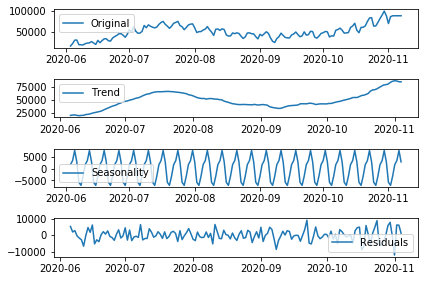

In [ ]:
trend , seasonal, residual=decompose(df['new_case'])

In [ ]:
adfuller(residual.dropna())

(-4.880269513414817,
 3.80931573999129e-05,
 12,
 139,
 {'1%': -3.4782936965183815,
  '5%': -2.882567574015525,
  '10%': -2.5779830117488745},
 2572.0809055910995)

In [ ]:
## fourier fit 
# fourier series fitting
from scipy.optimize import curve_fit
def fourier_trend(x, *a):
    w = 2 * np.pi / 365   ## 365: period
    ret = 0
    for deg in range(0, int(len(a) / 2) + 1):
        ret += a[deg] * np.cos(deg * w * x) + a[len(a) - deg - 1] * np.sin(deg * w * x)
    return ret

def main_trend(x, y):
    popt, pcov = curve_fit(fourier_trend, x, y, [1.0] * 15)
    plt.figure(figsize=(12,4)) 
   # plt.ylim(0, 100)
  #  plt.xlim(5000, 7500)        ## show a fragment of the figure
    plt.plot(x, y, color='r', label="original")
    plt.plot(x, fourier_trend(x, *popt), color='g', label="fourier")   
    plt.legend()
    plt.show()
    return popt

def fourier_season(x, *a):
    w = 2 * np.pi / 7   ## 365: period
    ret = 0
    for deg in range(0, int(len(a) / 2) + 1):
        ret += a[deg] * np.cos(deg * w * x) + a[len(a) - deg - 1] * np.sin(deg * w * x)
    return ret

def main_season(x, y):
    popt, pcov = curve_fit(fourier_season, x, y, [1.0] * 15)
    plt.figure(figsize=(12,4)) 
   # plt.ylim(0, 100)
  #  plt.xlim(5000, 7500)        ## show a fragment of the figure
    plt.plot(x, y, color='r', label="original")
    plt.plot(x, fourier_trend(x, *popt), color='g', label="fourier")   
    plt.legend()
    plt.show()
    return popt

/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


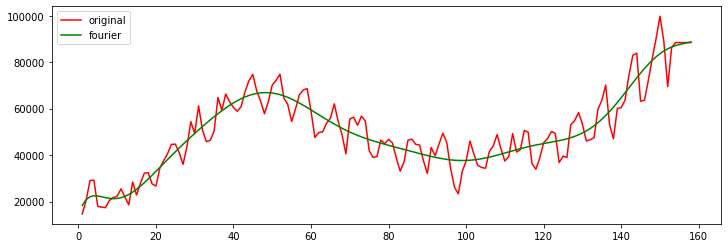

In [ ]:
z=np.linspace(1,len(df_label),len(df_label))

popt = main_trend(z, df_label['new_case'])  

In [ ]:
trend_fft=fourier_trend(z, *popt)
residual_fft=df_label['new_case']-trend_fft
adfuller(residual_fft.dropna())

(-7.171316477495075,
 2.7997262871001586e-10,
 11,
 146,
 {'1%': -3.4759527332353084,
  '5%': -2.881548071241103,
  '10%': -2.577438765246763},
 2787.1462810406874)

In [ ]:
##take differences
newcase_diff=df_label.diff().dropna()
adfuller(newcase_diff.values.T[0])

(-2.6550243262137116,
 0.08214956657282091,
 12,
 144,
 {'1%': -3.476597917537401,
  '5%': -2.8818291230495543,
  '10%': -2.5775887982253085},
 2836.4034192245495)

As we can see, all the three methods work fine to make the series stationary. Among these three methods, fft gives a lowesr adfuller value, though it sometimes is thought unreasonable since it is thought to ruin the time structure without thinking the sequence as a time series. And the decomposition method can sometimes give ridiculous result when the frequency/period of the series is not clearly presented. To make a balance between practice and theory, we choose decomposition method to make the series stationary.

#### Searching for the best ARIMA Model

Under most cases, a time series could explain itself well if there is no consistent exog effect (would could think exog features as consistent input energy to a close system). So we first did survey on the series itself. 

In [ ]:
## ARMA model - decomposition
from statsmodels.tsa.arima_model import ARIMA
ARIMA(residual.dropna(), order=(2,0,1)).fit().summary()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  resid   No. Observations:                  152
Model:                     ARMA(2, 1)   Log Likelihood               -1426.366
Method:                       css-mle   S.D. of innovations           2862.722
Date:                Mon, 14 Dec 2020   AIC                           2862.731
Time:                        23:21:09   BIC                           2877.851
Sample:                    06-06-2020   HQIC                          2868.873
                         - 11-04-2020                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.9588     34.278     -0.086      0.931     -70.142      64.224
ar.L1.resid     0.6114      0.081      7.590      0.000       0.454       0.769
ar.L2.resid    -0.4249      0.078     -5.444      0.000      -0.578      -0.272
ma.L1.resid    -0.8866      0.046    -19.121      0.000      -0.977      -0.796
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.7194           -1.3549j            1.5341           -0.1723
AR.2            0.7194           +1.3549j            1.5341            0.1723
MA.1            1.1279           +0.0000j            1.1279            0.0000
-----------------------------------------------------------------------------
"""

Notice that a time series model should never be too complicated. A small p and q usually would explain the patten well. Thus we did our search with p in [0,1,2], q in [0,1,2].In the latest verion of report, we decided to choose decomposition to make the series sationary, so there would not be a 'I' term in ARIMA.

In [ ]:
## searching hyperparameters
import warnings
warnings.filterwarnings("ignore")

def validation(series,k):
    RMSE_final=10000000
    for p in [1,2]:
        for q in [0,1,]:
            interval=round((len(series)/2)//k)
            RMSE=[]
            for i in range(k-1):
                train=series.iloc[:round(len(series)/2)+(i+1)*interval]
                test=series.iloc[round(len(series)/2)+(i+1)*interval:round(len(series)/2)+(i+2)*interval]
                model=ARIMA(train, order=(p,0,q)).fit()
                test_predict=model.predict(start=test.index[0],end=test.index[-1])
                RMSE.append(np.sqrt(np.sum((test_predict-test)**2)/len(test)))
                RMSE_average=np.mean(RMSE)
            if RMSE_average<RMSE_final:
                RMSE_final=RMSE_average
                P,Q=p,q
    return RMSE_final,P,Q

In [ ]:
RMSE_final,P,Q=validation(residual.dropna(),6)

In [ ]:
RMSE_final,P,Q

(3847.7990660670207, 2, 0)

The ARMA model with the smallest RMSE is ARIMA(2,0,1). But we should be very careful when not using AIC, since p and q are controling the number of parameters we have, larger p and larger q would give a lower RMSE. AIC handles that with a panelty on the number of parameters. But we do not have such terms in RMSE.

In [ ]:
ARIMA(residual.dropna(),order=(2,0,1)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  resid   No. Observations:                  152
Model:                     ARMA(2, 1)   Log Likelihood               -1426.366
Method:                       css-mle   S.D. of innovations           2862.722
Date:                Mon, 14 Dec 2020   AIC                           2862.731
Time:                        23:47:34   BIC                           2877.851
Sample:                    06-06-2020   HQIC                          2868.873
                         - 11-04-2020                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.9588     34.278     -0.086      0.931     -70.142      64.224
ar.L1.resid     0.6114      0.081      7.590      0.000       0.454       0.769
ar.L2.resid    -0.4249      0.078     -5.444      0.000      -0.578      -0.272
ma.L1.resid    -0.8866      0.046    -19.121      0.000      -0.977      -0.796
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.7194           -1.3549j            1.5341           -0.1723
AR.2            0.7194           +1.3549j            1.5341            0.1723
MA.1            1.1279           +0.0000j            1.1279            0.0000
-----------------------------------------------------------------------------
"""

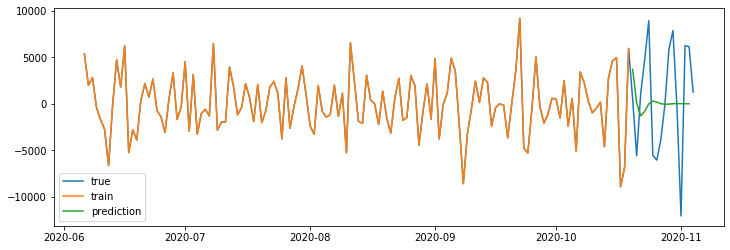

In [ ]:
series=residual.dropna()
i=3
train=series.iloc[:round(len(series)/2)+(i+1)*interval]
test=series.iloc[round(len(series)/2)+(i+1)*interval:round(len(series)/2)+(i+2)*interval]
model=ARIMA(train, order=(2,0,1)).fit()
test_predict=model.predict(start=test.index[0],end=test.index[-1])
plt.figure(figsize=(12,4))
plt.plot(residual.dropna(),label='true')
plt.plot(train,label='train')
plt.plot(test_predict,label='prediction')
plt.legend()

[This is the figure of residual of new cases after decomposition, not the new cases] We should keep in mind that time series is powerful when predicting values small steps forward. And the values it predicted is actually the mean of the distribution at each time point. And it will converge to a value eventually since the time series is stationary. The figure above is a successful time series model which capture the mean and follows the observed true values in small time steps.

#### searching for the best ARIMAX model

now we try to add some exog features to see whether we can improve the time series model. Now we have to reconsider the stationary problems. We have to either make either of the label and exog features stationary, or make the label cointegration. According to the dataset section, we know that some of our exog features are actually a trend, making them stationary is not ideal in time series. Thus, we take the new_case rather than residuals to hopefully make the model cointegraton.

In [ ]:
## searching hyperparameters
import warnings
warnings.filterwarnings("ignore")

def validation_armax(series,k,x_fs):
    RMSE_final=10000000
    for p in [1,2]:
        for q in [0,1]:
            interval=round((len(series)/2)//k)
            RMSE=[]
            for i in range(k-1):
                train=series.iloc[:round(len(series)/2)+(i+1)*interval]
                test=series.iloc[round(len(series)/2)+(i+1)*interval:round(len(series)/2)+(i+2)*interval]
                model=ARIMA(train, order=(p,0,q),exog=np.array(x_fs.iloc[:round(len(series)/2)+(i+1)*interval])).fit()
                test_predict=model.predict(start=test.index[0],end=test.index[-1],exog=np.array(x_fs.iloc[round(len(series)/2)+(i+1)*interval:round(len(series)/2)+(i+2)*interval]))
                RMSE.append(np.sqrt(np.sum((test_predict-test)**2)/len(test)))
                RMSE_average=np.mean(RMSE)
            if RMSE_average<RMSE_final:
                RMSE_final=RMSE_average
                P,Q=p,q
    return RMSE_final,P,Q

In [ ]:
RMSE_final,P,Q=validation_armax(residual.dropna(),6,X_FS1)

In [ ]:
RMSE_final,P,Q

(3979.5829815086377, 2, 0)

In [ ]:
ARIMA(df_label, order=(2,0,0),exog=np.array(X_FS1)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               new_case   No. Observations:                  158
Model:                     ARMA(2, 0)   Log Likelihood               -1609.949
Method:                       css-mle   S.D. of innovations           6410.552
Date:                Tue, 15 Dec 2020   AIC                           3233.897
Time:                        00:36:43   BIC                           3255.336
Sample:                    06-03-2020   HQIC                          3242.604
                         - 11-07-2020                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -207.4907   1.21e+04     -0.017      0.986   -2.39e+04    2.35e+04
x1                -0.0410      0.020     -2.077      0.038      -0.080      -0.002
x2                 0.1191      0.051      2.330      0.020       0.019       0.219
x3                 0.0084      0.004      2.210      0.027       0.001       0.016
ar.L1.new_case     1.0252      0.079     12.929      0.000       0.870       1.181
ar.L2.new_case    -0.1637      0.081     -2.026      0.043      -0.322      -0.005
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2086           +0.0000j            1.2086            0.0000
AR.2            5.0551           +0.0000j            5.0551            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
RMSE_final,P,Q=validation_armax(residual.dropna(),6,X_FS2)

In [ ]:
RMSE_final,P,Q

(3873.961454215573, 2, 0)

In [ ]:
ARIMA(df_label, order=(2,0,0),exog=np.array(X_FS2)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               new_case   No. Observations:                  158
Model:                     ARMA(2, 0)   Log Likelihood               -1597.050
Method:                       css-mle   S.D. of innovations           5899.392
Date:                Tue, 15 Dec 2020   AIC                           3208.100
Time:                        00:37:32   BIC                           3229.538
Sample:                    06-03-2020   HQIC                          3216.806
                         - 11-07-2020                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2.417e+04   1.91e+04      1.269      0.205   -1.32e+04    6.15e+04
x1                 0.0039      0.003      1.373      0.170      -0.002       0.009
x2                 9.5069      1.561      6.091      0.000       6.448      12.566
x3                 8.7002      7.669      1.134      0.257      -6.331      23.732
ar.L1.new_case     0.8316      0.091      9.161      0.000       0.654       1.010
ar.L2.new_case     0.1049      0.093      1.127      0.260      -0.078       0.287
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0605           +0.0000j            1.0605            0.0000
AR.2           -8.9857           +0.0000j            8.9857            0.5000
-----------------------------------------------------------------------------
"""

We can observe that some time AIC and RMSE are conflict. And even though AIC performs well, there is a huge risk that the parameter would not pass the t test since we can not guarantee the exog features have cointegration relationship.

In [ ]:
series=df_label
i=3
train=series.iloc[:round(len(series)/2)+(i+1)*interval]
test=series.iloc[round(len(series)/2)+(i+1)*interval:round(len(series)/2)+(i+2)*interval]
model=ARIMA(train, order=(2,0,0),exog=np.array(X_FS1.iloc[:round(len(series)/2)+(i+1)*interval])).fit()
test_predict=model.predict(start=test.index[0],end=test.index[-1],exog=np.array(X_FS1.iloc[round(len(series)/2)+(i+1)*interval:round(len(series)/2)+(i+2)*interval]))

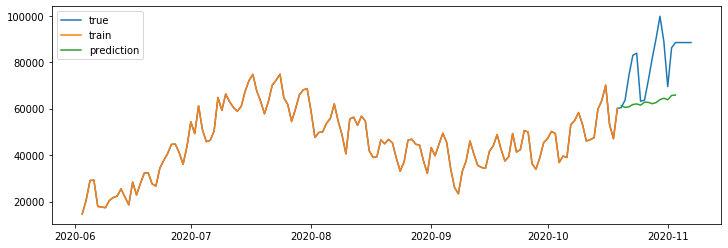

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(df_label.dropna(),label='true')
plt.plot(train,label='train')
plt.plot(test_predict,label='prediction')
plt.legend()

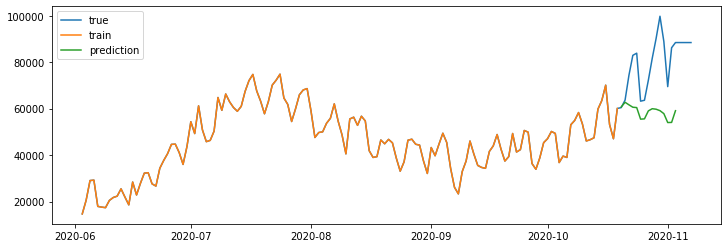

In [ ]:
series=df_label
i=3
train=series.iloc[:round(len(series)/2)+(i+1)*interval]
test=series.iloc[round(len(series)/2)+(i+1)*interval:round(len(series)/2)+(i+2)*interval]
model=ARIMA(train, order=(2,0,0),exog=np.array(X_FS2.iloc[:round(len(series)/2)+(i+1)*interval])).fit()
test_predict=model.predict(start=test.index[0],end=test.index[-1],exog=np.array(X_FS2.iloc[round(len(series)/2)+(i+1)*interval:round(len(series)/2)+(i+2)*interval]))
plt.figure(figsize=(12,4))
plt.plot(df_label.dropna(),label='true')
plt.plot(train,label='train')
plt.plot(test_predict,label='prediction')
plt.legend()

The picture verified our thoughts again. Though the AIC and RMSE based on the second feature selection method are lower than the first one, the result turns out no good when the trend is steep.

#### additional: searching best ARIMA model for each state

According to the process that we make the new cases for USA stationary, we know that the series would be stationary after taking the differences. For convenience, we take differences of new cases for each state and assume they are stationary.i.e. we are performing ARIMA(p,1,q)

In [ ]:
## searching hyperparameters
import warnings
warnings.filterwarnings("ignore")

def validation_arima_state(panel,k):
    RMSE_final=10000000
    PQ=[]
    for n in range(len(panel.columns)):
        series=panel.iloc[:,[n]]
        for p in [1,2]:
            for q in [0,0]:
                interval=len(series)//k
                RMSE=[]
                for i in range(k-1):
                    train=series.iloc[:(i+1)*interval]
                    test=series.iloc[(i+1)*interval:(i+2)*interval]
                    model=ARIMA(train, order=(p,1,q)).fit()
                    test_predict=model.predict(start=test.index[0],end=test.index[-1])
                    RMSE.append(np.sqrt(np.sum((test_predict-test)**2)/len(test)))
                    RMSE_average=np.mean(RMSE)
                if RMSE_average<RMSE_final:
                    RMSE_final=RMSE_average
                    P,Q=p,q
        PQ.append([P,Q])                  
    return PQ

Here we would show four examples of the estimates.

In [ ]:
    panel=df_panel_state.iloc[:,10:14]
    RMSE_final=10000000
    PQ=[]
    for n in range(len(panel.columns)):
        series=panel.iloc[:,[n]]
        for p in [1,2]:
            for q in [0,0]:
                interval=len(series)//k
                RMSE=[]
                for i in range(k-1):
                    train=series.iloc[:(i+1)*interval]
                    test=series.iloc[(i+1)*interval:(i+2)*interval]
                    model=ARIMA(train, order=(p,1,q)).fit()
                    test_predict=model.predict(start=test.index[0],end=test.index[-1])
                    RMSE.append(np.sqrt(np.sum((test_predict-test)**2)/len(test)))
                    RMSE_average=np.mean(RMSE)
                if RMSE_average<RMSE_final:
                    RMSE_final=RMSE_average
                    P,Q=p,q
        PQ.append([P,Q])

In [ ]:
PQ

[[1, 0], [1, 0], [1, 0], [1, 0]]

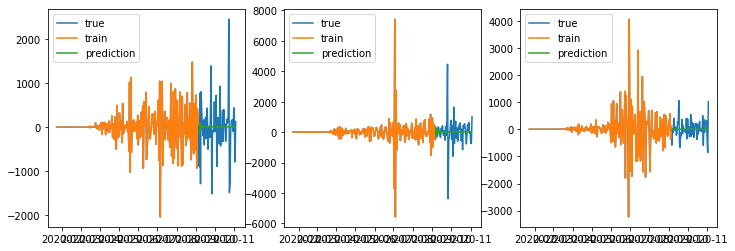

In [ ]:
plt.figure(figsize=(12,4))

i=3
series=panel.iloc[:,[0]]
train=series.iloc[:(i+1)*interval]
test=series.iloc[(i+1)*interval:(i+2)*interval]
model=ARIMA(train, order=(PQ[0][0],1,PQ[0][1])).fit()
test_predict=model.predict(start=test.index[0],end=test.index[-1])
plt.subplot(1,3,1)
plt.plot(series.diff(),label='true')
plt.plot(train.diff(),label='train')
plt.plot(test_predict,label='prediction')
plt.legend()

series=panel.iloc[:,[1]]
train=series.iloc[:(i+1)*interval]
test=series.iloc[(i+1)*interval:(i+2)*interval]
model=ARIMA(train, order=(PQ[1][0],1,PQ[1][1])).fit()
test_predict=model.predict(start=test.index[0],end=test.index[-1])
plt.subplot(1,3,2)
plt.plot(series.diff(),label='true')
plt.plot(train.diff(),label='train')
plt.plot(test_predict,label='prediction')
plt.legend()

series=panel.iloc[:,[2]]
train=series.iloc[:(i+1)*interval]
test=series.iloc[(i+1)*interval:(i+2)*interval]
model=ARIMA(train, order=(PQ[2][0],1,PQ[2][1])).fit()
test_predict=model.predict(start=test.index[0],end=test.index[-1])
plt.subplot(1,3,3)
plt.plot(series.diff(),label='true')
plt.plot(train.diff(),label='train')
plt.plot(test_predict,label='prediction')
plt.legend()

#### Results

After merging all of out result into the metric we mentioned above, we have:


| Model\RMSE        | Model-VarianceMathod     | Model-CorrelationFilter |
| :------------- | :----------: | -----------: | 
|  Baseline(Linear)   | 31152   | 21825|
| ARIMA       |     <td colspan=2> 3847   |
| ARIMAX  | 3979 | 3873 |

One thing to note here is that we don't need to apply feature selection before fitting ARIMA model. So, it have only one entry.
We see that by applying time series model, it significantly increase the model performance in comparison to the baseline model. 

### Tree Regression and Random Forest Regression
Another method we used was tree regression, as well as random forest regression. Inspired by ARIMAX, we tried to substitute linear regression to other regression methods. We train these methods using grid search, which return the best hyperparameter of the model. We evaluate the hyperparameters by time-series crossvalidation. Because previous cases implicitly affact latter ones, we couldn't use common crossvalidation. Random Forest took longer time to train than tree, because it includes muliple trees. For tree regression, we evaluated criterion, splitter, max_depth, min_samples_leaf, while for random forest regression, we evaluated n_estimators, criterion, min_samples_leaf.

A way of hyperparameter search we tried is to calculate the mean square of percentage of error, i.e., difference would be divided by true value before being squared. The intuition behind this is that, for example, 1000 cases is trivial for 1 million new cases in latter days, but significant for 1500 cases in early days. After finding hyperparameters, we built the model on the original training set as well as two training set whose features had been selected.

In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from itertools import product

def find_best_tree(X_train, y_train, X_test, y_test):
    X_train = np.array(X_train)
    y_train = np.array(y_train).ravel()
    X_test = np.array(X_test)
    y_test = np.array(y_test).ravel()
    
    best_MSE = 1e99
    MSEs = []
    k = 5
    groupSize = len(y_train) // k
    pool = product(['mse', 'friedman_mse', 'mae'], ['best', 'random'], list(range(1, 11)), list(range(1, 6)))

    for criterion, splitter, max_depth, min_samples_leaf in pool:
        MSE_temp = []
        for i in range(k - 1):
            X_train_train, X_train_dev = X_train[:(i + 1) * groupSize], X_train[(i + 1) * groupSize:]
            y_train_train, y_train_dev = y_train[:(i + 1) * groupSize], y_train[(i + 1) * groupSize:]
            model = DecisionTreeRegressor(criterion = criterion, splitter = splitter, 
                                          max_depth = max_depth, min_samples_leaf = min_samples_leaf)
            y_train_dev_predict = model.fit(X_train_train, y_train_train).predict(X_train_dev)
            MSE_temp.append(np.mean(((y_train_dev_predict - y_train_dev) / y_train_dev) ** 2))
        
        MSE = np.mean(MSE_temp)
        MSEs.append(MSE)
        
        if MSE < best_MSE:
            best_MSE = MSE
            tree = model
            best_tree = criterion, splitter, max_depth, min_samples_leaf
    
    print('The best hyperparameter of tree is ' + str(best_tree))
    
    y_train_predict = tree.fit(X_train, y_train).predict(X_train)
    print('Error of the best tree on train set is ' + str(np.sqrt(np.mean((y_train_predict - y_train) ** 2))))
    
    y_test_predict = tree.fit(X_train, y_train).predict(X_test)
    print('Error of the best tree on test set is ' + str(np.sqrt(np.mean((y_test_predict - y_test) ** 2))))
    
    print('Fluctuation during training is ' + str(np.std(MSEs)))
            
def find_best_rf(X_train, y_train, X_test, y_test):
    X_train = np.array(X_train)
    y_train = np.array(y_train).ravel()
    X_test = np.array(X_test)
    y_test = np.array(y_test).ravel()
    
    best_MSE = 1e99
    MSEs = []
    k = 5
    groupSize = len(y_train) // k
    pool = product([10, 100, 1000], ['mse', 'mae'], list(range(1, 6)))

    for n_estimators, criterion, min_samples_leaf in pool:
        MSE_temp = []
        for i in range(k - 1):
            X_train_train, X_train_dev = X_train[:(i + 1) * groupSize], X_train[(i + 1) * groupSize:]
            y_train_train, y_train_dev = y_train[:(i + 1) * groupSize], y_train[(i + 1) * groupSize:]
            model = RandomForestRegressor(n_estimators = n_estimators, criterion = criterion, 
                                          min_samples_leaf = min_samples_leaf)
            y_train_dev_predict = model.fit(X_train_train, y_train_train).predict(X_train_dev)
            MSE_temp.append(np.mean(((y_train_dev_predict - y_train_dev) / y_train_dev) ** 2))
        
        MSE = np.mean(MSE_temp)
        MSEs.append(MSE)
        
        if MSE < best_MSE:
            best_MSE = MSE
            rf = model
            best_rf = n_estimators, criterion, min_samples_leaf
    
    print('The best hyperparameter of random forest is ' + str(best_rf))
    
    y_train_predict = rf.fit(X_train, y_train).predict(X_train)
    print('Error of the best random forest on train set is ' + str(np.sqrt(np.mean((y_train_predict - y_train) ** 2))))
    
    y_test_predict = rf.fit(X_train, y_train).predict(X_test)
    print('Error of the best random forest on test set is ' + str(np.sqrt(np.mean((y_test_predict - y_test) ** 2))))
    print('Fluctuation during training is ' + str(np.std(MSEs))) 

In [25]:
# All features
find_best_tree(df_train, y_train, df_test, y_test)
find_best_rf(df_train, y_train, df_test, y_test)

# Variance method
find_best_tree(df_train_variancemethods, y_train, df_test_variancemethods, y_test)
find_best_rf(df_train_variancemethods, y_train, df_test_variancemethods, y_test)

# Correlation Filter
find_best_tree(df_train_corrfilter, y_train, df_test_corrfilter, y_test)
find_best_rf(df_train_corrfilter, y_train, df_test_corrfilter, y_test)

The best hyperparameter of tree is ('mae', 'random', 5, 1)
Error of the best tree on train set is 3467.992632292894
Error of the best tree on test set is 31321.02469948591
Fluctuation during training is 0.025443130855713827
The best hyperparameter of random forest is (10, 'mae', 1)
Error of the best random forest on train set is 2473.1273821194445
Error of the best random forest on test set is 16869.157144432214
Fluctuation during training is 0.008187474551344501
The best hyperparameter of tree is ('mae', 'random', 1, 1)
Error of the best tree on train set is 11401.439423561125
Error of the best tree on test set is 32767.951520945466
Fluctuation during training is 0.02131744029984397
The best hyperparameter of random forest is (10, 'mae', 1)
Error of the best random forest on train set is 2576.3242010311706
Error of the best random forest on test set is 29945.499149233998
Fluctuation during training is 0.012616574621499087
The best hyperparameter of tree is ('friedman_mse', 'random', 1

We also tried common methods of hyperparameter search, which used same criteria as the previous Time Series Model.

In [26]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from itertools import product

def find_best_tree(X_train, y_train, X_test, y_test):
    X_train = np.array(X_train)
    y_train = np.array(y_train).ravel()
    X_test = np.array(X_test)
    y_test = np.array(y_test).ravel()
    
    best_MSE = 1e99
    MSEs = []
    k = 5
    groupSize = len(y_train) // k
    pool = product(['mse', 'friedman_mse', 'mae'], ['best', 'random'], list(range(1, 11)), list(range(1, 6)))

    for criterion, splitter, max_depth, min_samples_leaf in pool:
        MSE_temp = []
        for i in range(k - 1):
            X_train_train, X_train_dev = X_train[:(i + 1) * groupSize], X_train[(i + 1) * groupSize:]
            y_train_train, y_train_dev = y_train[:(i + 1) * groupSize], y_train[(i + 1) * groupSize:]
            model = DecisionTreeRegressor(criterion = criterion, splitter = splitter, 
                                          max_depth = max_depth, min_samples_leaf = min_samples_leaf)
            y_train_dev_predict = model.fit(X_train_train, y_train_train).predict(X_train_dev)
            MSE_temp.append(np.mean((y_train_dev_predict - y_train_dev) ** 2))
        
        MSE = np.mean(MSE_temp)
        MSEs.append(MSE)
        
        if MSE < best_MSE:
            best_MSE = MSE
            tree = model
            best_tree = criterion, splitter, max_depth, min_samples_leaf
    
    print('The best hyperparameter of tree is ' + str(best_tree))
    
    y_train_predict = tree.fit(X_train, y_train).predict(X_train)
    print('Error of the best tree on train set is ' + str(np.sqrt(np.mean((y_train_predict - y_train) ** 2))))
    
    y_test_predict = tree.fit(X_train, y_train).predict(X_test)
    print('Error of the best tree on test set is ' + str(np.sqrt(np.mean((y_test_predict - y_test) ** 2))))
    
    print('Fluctuation during training is ' + str(np.std(MSEs)))
            
def find_best_rf(X_train, y_train, X_test, y_test):
    X_train = np.array(X_train)
    y_train = np.array(y_train).ravel()
    X_test = np.array(X_test)
    y_test = np.array(y_test).ravel()
    
    best_MSE = 1e99
    MSEs = []
    k = 5
    groupSize = len(y_train) // k
    pool = product([10, 100, 1000], ['mse', 'mae'], list(range(1, 6)))

    for n_estimators, criterion, min_samples_leaf in pool:
        MSE_temp = []
        for i in range(k - 1):
            X_train_train, X_train_dev = X_train[:(i + 1) * groupSize], X_train[(i + 1) * groupSize:]
            y_train_train, y_train_dev = y_train[:(i + 1) * groupSize], y_train[(i + 1) * groupSize:]
            model = RandomForestRegressor(n_estimators = n_estimators, criterion = criterion, 
                                          min_samples_leaf = min_samples_leaf)
            y_train_dev_predict = model.fit(X_train_train, y_train_train).predict(X_train_dev)
            MSE_temp.append(np.mean((y_train_dev_predict - y_train_dev) ** 2))
        
        MSE = np.mean(MSE_temp)
        MSEs.append(MSE)
        
        if MSE < best_MSE:
            best_MSE = MSE
            rf = model
            best_rf = n_estimators, criterion, min_samples_leaf
    
    print('The best hyperparameter of random forest is ' + str(best_rf))
    
    y_train_predict = rf.fit(X_train, y_train).predict(X_train)
    print('Error of the best random forest on train set is ' + str(np.sqrt(np.mean((y_train_predict - y_train) ** 2))))
    
    y_test_predict = rf.fit(X_train, y_train).predict(X_test)
    print('Error of the best random forest on test set is ' + str(np.sqrt(np.mean((y_test_predict - y_test) ** 2))))
    print('Fluctuation during training is ' + str(np.std(MSEs))) 

In [27]:
find_best_tree(df_train, y_train, df_test, y_test)
find_best_rf(df_train, y_train, df_test, y_test)

# Variance method
find_best_tree(df_train_variancemethods, y_train, df_test_variancemethods, y_test)
find_best_rf(df_train_variancemethods, y_train, df_test_variancemethods, y_test)

# Correlation Filter
find_best_tree(df_train_corrfilter, y_train, df_test_corrfilter, y_test)
find_best_rf(df_train_corrfilter, y_train, df_test_corrfilter, y_test)

The best hyperparameter of tree is ('mae', 'random', 9, 5)
Error of the best tree on train set is 4902.206133607394
Error of the best tree on test set is 16313.582792885276
Fluctuation during training is 38130346.55397034
The best hyperparameter of random forest is (10, 'mae', 1)
Error of the best random forest on train set is 2258.017112284599
Error of the best random forest on test set is 17574.91643037076
Fluctuation during training is 14369455.067059422
The best hyperparameter of tree is ('mse', 'random', 2, 2)
Error of the best tree on train set is 9574.66352513154
Error of the best tree on test set is 26427.869311594302
Fluctuation during training is 32478969.065818503
The best hyperparameter of random forest is (1000, 'mae', 1)
Error of the best random forest on train set is 2114.155046617814
Error of the best random forest on test set is 33025.36609276717
Fluctuation during training is 23404194.345675237
The best hyperparameter of tree is ('mae', 'random', 5, 4)
Error of the be

The best test error of tree/random forest regression model was around 14000. The error was not stable, due to lack of examples. Since in our model, number of examples was exact same as number of days, it is almost impossible to improve the number of examples. Another found was that in these cases, sometimes tree regression provided better results than random forest. Since the model was implicitly under-fitting, the over-fitting method (tree regression), may ocassionally performed better, comparing to the method of random forest, which even increase the degree of under-fitting. These were intuitions seeing the performance of these model. Even so, tree regression (random forest regression) could achieve a level of 'accuracy' not far from linear regression, which provided another way applying ideas of ARIMAX.

# Discussion

## What you've learned

*Note: you don't have to answer all of these, and you can answer other questions if you'd like. We just want you to demonstrate what you've learned from the project.*

###What concepts from lecture/breakout were most relevant to your project? How so?
Regression, Trees, Bias-Variance trade-off

###What aspects of your project did you find most surprising?
Using time series model can predict the trend and seasonality very well!

###What lessons did you take from this project that you want to remember for the next ML project you work on? Do you think those lessons would transfer to other datasets and/or models? Why or why not?
How to handle the missing data is very important for a project. If we do not carefully it, it will return us a useless dataset after we did data cleaning. 


###What was the most helpful feedback you received during your presentation? Why?
The feedback about considering state factor is really helpful. We eventually accepted that idea and implemented time seires models for each of the state and 

###If you had two more weeks to work on this project, what would you do next? Why?
Try to implement PCA or L1-norm and L2-norm to do feature selection or applied other methods like RNN or CNN(although we don't think it will be working because of our small dataset). Or, we may perform some transformations to our variables or labels to see how they affect the results of our model. Lastly, we may want to use different loss functions as criterior to compare different models.





